In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [20]:
filepath = '/content/timeseriesdata.csv'
df = pd.read_csv(filepath)
df

,Quarter,hdbrpi,labour-cost,gdp,population,cpi,exchange-rate,consumer-spending,overall unemployment,sti
0,1990 1Q,24.3,74.7,"16,669.50","2,647,627",61.907,1.8843,16.113111,31600,1458.400000
1,1990 2Q,24.4,70.5,"17,087.70","2,677,041",62.501,1.8396,16.999927,31600,1527.000000
2,1990 3Q,25.0,73.8,"17,930.10","2,706,454",63.181,1.7632,17.886744,31600,1098.700000
3,1990 4Q,24.7,84.9,"18,805","2,735,868",63.969,1.7445,18.773560,31600,1154.800000
4,1991 1Q,24.9,80.5,"18,521","2,750,577",64.249,1.7931,19.660376,31600,1490.800000
...,...,...,...,...,...,...,...,...,...,...
91,2012 4Q,146.7,98.3,"94,848.80","3,818,205",97.936,1.2221,113.643019,63500,3167.080078
92,2013 1Q,148.6,101.0,"93,773","3,824,842",98.574,1.2436,114.828898,65700,3308.100098
93,2013 2Q,149.4,88.5,"95,587.20","3,831,478",97.656,1.2652,115.705388,67900,3150.439941
94,2013 3Q,148.1,89.3,"96,028.30","3,838,115",98.865,1.2572,116.581878,63300,3167.870117


In [21]:
def todatetime(row):
    row['Quarter'] = row['Quarter'].replace(' 1Q', '-03')
    row['Quarter'] = row['Quarter'].replace(' 2Q', '-06')
    row['Quarter'] = row['Quarter'].replace(' 3Q', '-09')
    row['Quarter'] = row['Quarter'].replace(' 4Q', '-12')
    
    return row

df1 = df.apply(todatetime, axis='columns')
df1['Quarter'] = pd.to_datetime(df1['Quarter'], infer_datetime_format = True)

In [22]:
def tofloat(row):
    row['gdp'] = row['gdp'].replace(',', '')
    row['population'] = row['population'].replace(',', '')
    return row

df2 = df1.apply(tofloat, axis='columns')
df2['gdp'] = df2['gdp'].astype(float)
df2['population'] = df2['population'].astype(float)
df2['overall unemployment'] = df2['overall unemployment'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Quarter               96 non-null     datetime64[ns]
 1   hdbrpi                96 non-null     float64       
 2   labour-cost           96 non-null     float64       
 3   gdp                   96 non-null     float64       
 4   population            96 non-null     float64       
 5   cpi                   96 non-null     float64       
 6   exchange-rate         96 non-null     float64       
 7   consumer-spending     96 non-null     float64       
 8   overall unemployment  96 non-null     float64       
 9   sti                   96 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 7.6 KB


In [23]:
df3 = df2.drop(columns = 'Quarter')
df3

,hdbrpi,labour-cost,gdp,population,cpi,exchange-rate,consumer-spending,overall unemployment,sti
0,24.3,74.7,16669.5,2647627.0,61.907,1.8843,16.113111,31600.0,1458.400000
1,24.4,70.5,17087.7,2677041.0,62.501,1.8396,16.999927,31600.0,1527.000000
2,25.0,73.8,17930.1,2706454.0,63.181,1.7632,17.886744,31600.0,1098.700000
3,24.7,84.9,18805.0,2735868.0,63.969,1.7445,18.773560,31600.0,1154.800000
4,24.9,80.5,18521.0,2750577.0,64.249,1.7931,19.660376,31600.0,1490.800000
...,...,...,...,...,...,...,...,...,...
91,146.7,98.3,94848.8,3818205.0,97.936,1.2221,113.643019,63500.0,3167.080078
92,148.6,101.0,93773.0,3824842.0,98.574,1.2436,114.828898,65700.0,3308.100098
93,149.4,88.5,95587.2,3831478.0,97.656,1.2652,115.705388,67900.0,3150.439941
94,148.1,89.3,96028.3,3838115.0,98.865,1.2572,116.581878,63300.0,3167.870117


In [24]:
dataY = df3['hdbrpi']
dataY = dataY.to_numpy()

In [25]:
dataX = df3.drop(columns=['hdbrpi'])
dataX = dataX.to_numpy()

In [37]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dataX, dataY, test_size=0.15, shuffle=True)

In [38]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)
X = scaler.transform(dataX) #for plotting

In [39]:
from sklearn.svm import SVR

SVR_model = SVR(kernel="rbf", C=1000, epsilon=0.1)
SVR_model.fit(Xtrain, Ytrain)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [40]:
SVR_predict_train = SVR_model.predict(Xtrain)
SVR_mse_train = mean_squared_error(Ytrain, SVR_predict_train)
SVR_mse_train

1.5431187321123612

In [41]:
SVR_predict_test = SVR_model.predict(Xtest)
SVR_mse_test = mean_squared_error(Ytest, SVR_predict_test)
SVR_mse_test

36.323573393585704

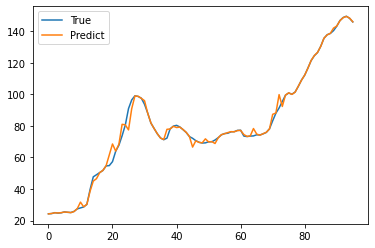

In [42]:
pred_SVR = SVR_model.predict(X)

plt.plot(dataY, label='True')
plt.plot(pred_SVR, label='Predict')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(Xtrain, Ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
RF_predict_train = RF_model.predict(Xtrain)
RF_mse_train = mean_squared_error(Ytrain, RF_predict_train)
RF_mse_train

5.097991358024697

In [ ]:
RF_predict_test = RF_model.predict(Xtest)
RF_mse_test = mean_squared_error(Ytest, RF_predict_test)
RF_mse_test

9.342366666666686

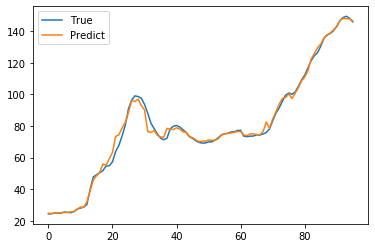

In [ ]:
pred_RF = RF_model.predict(X)

plt.plot(dataY, label='True')
plt.plot(pred_RF, label='Predict')
plt.legend()
plt.show()

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

GB_model = GradientBoostingRegressor(n_estimators=100)
GB_model.fit(Xtrain, Ytrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
GB_predict_train = GB_model.predict(Xtrain)
GB_mse_train = mean_squared_error(Ytrain, GB_predict_train)
GB_mse_train

0.11470703944040711

In [16]:
GB_predict_test = GB_model.predict(Xtest)
GB_mse_test = mean_squared_error(Ytest, GB_predict_test)
GB_mse_test

5.151805642393035

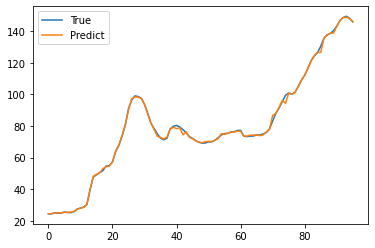

In [18]:
pred_GB = GB_model.predict(X)

plt.plot(dataY, label='True')
plt.plot(pred_GB, label='Predict')
plt.legend()
plt.show()